## Problem Statement 
The goal is to identify the key properties of products and stores that influence sales, which can help BigMart understand and improve its sales strategy.

## Hypotesis Generetion  
1.  `Story Size` : Larger story may have higher sales as they can accomodate larger variety of products and attract more customers.
1.   `Location` : Stores located in densely populated arias or in commercial hubs may experience higher sales 
1.  ``Pricing`` : Products with lower prices and discounted offers may have higher sales compared to similar product with higher prices 
1. ``Seasonality``: Certain products may have higher sales during specific seasons or holidays, such as sunscreen in summer or chocolates during Christmas
1.  ``Competition``: Stores located in close proximity to competitors may face challenges in sales, while stores with limited competition may have higher sales.

## Load Packages And Data

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
Test = pd.read_csv("../input/salebigmart/Test.csv")
Train = pd.read_csv("../input/salebigmart/Train.csv")


## Data Structure 

In [180]:
num_rows, num_cols = Train.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 8523
Number of columns: 12


In [181]:
# Get the column names
column_names = Train.columns
column_names_test = Test.columns
print("Column names:", column_names)
print("Column names test:", column_names_test)


Column names: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Column names test: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [182]:
# Check the data types
data_types = Train.dtypes
print("Data types:")
print(data_types)


Data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [183]:
# Get information about the DataFrame
df_info = Train.info()
print("Dataset information:")
print(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Dataset information:
None


In [184]:
# Get summary statistics of the DataFrame
df_summary = Train.describe()
print("Summary statistics:")
print(df_summary)


Summary statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [185]:
Fat_Content = Train['Item_Fat_Content'].unique()
Identifier = Train['Item_Identifier'].unique()
Outlet_Identifier = Train['Outlet_Identifier'].unique()
Fat_Content.sort()
Identifier.sort()
Outlet_Identifier.sort()
Fat_Content  , Identifier , Outlet_Identifier

(array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object),
 array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
       dtype=object),
 array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object))

In [186]:
# convert to lower case
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].str.lower()
# remove trailing white spaces
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].str.strip()
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].astype(str).str.strip()
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].str.lower()

Fat_Content = Train['Item_Fat_Content'].unique()
Fat_Content.sort()
Fat_Content

array(['lf', 'low fat', 'reg', 'regular'], dtype=object)

In [187]:

Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(['lf'], 'low fat')
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(['reg'], 'regular')
Train['Outlet_Identifier'] = Train['Outlet_Identifier'].str.replace('OUT0', '')

Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(['lf'], 'low fat')
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(['reg'], 'regular')
Test['Outlet_Identifier'] = Test['Outlet_Identifier'].str.replace('OUT0', '')
# Get the unique values and sort them
Fat_Content = Train['Item_Fat_Content'].unique()
Fat_Content.sort()
Fat_Content_test = Test['Item_Fat_Content'].unique()
Fat_Content_test.sort()
Outlet_Identifier = Train['Outlet_Identifier'].unique()
Outlet_Identifier.sort()
Outlet_Identifier_test = Test['Outlet_Identifier'].unique()
Outlet_Identifier_test.sort()
Outlet_Identifier , Fat_Content , Outlet_Identifier_test , Fat_Content_test 

(array(['10', '13', '17', '18', '19', '27', '35', '45', '46', '49'],
       dtype=object),
 array(['low fat', 'regular'], dtype=object),
 array(['10', '13', '17', '18', '19', '27', '35', '45', '46', '49'],
       dtype=object),
 array(['low fat', 'regular'], dtype=object))

In [188]:
Train.head()


Test_copy = Test.copy()



## Exploratory Data Analysis , Univariate Analysis , Bivariate Analysis , Missing Value Treatement

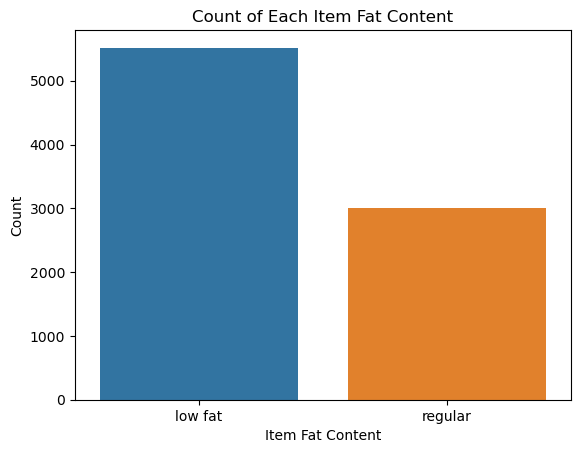

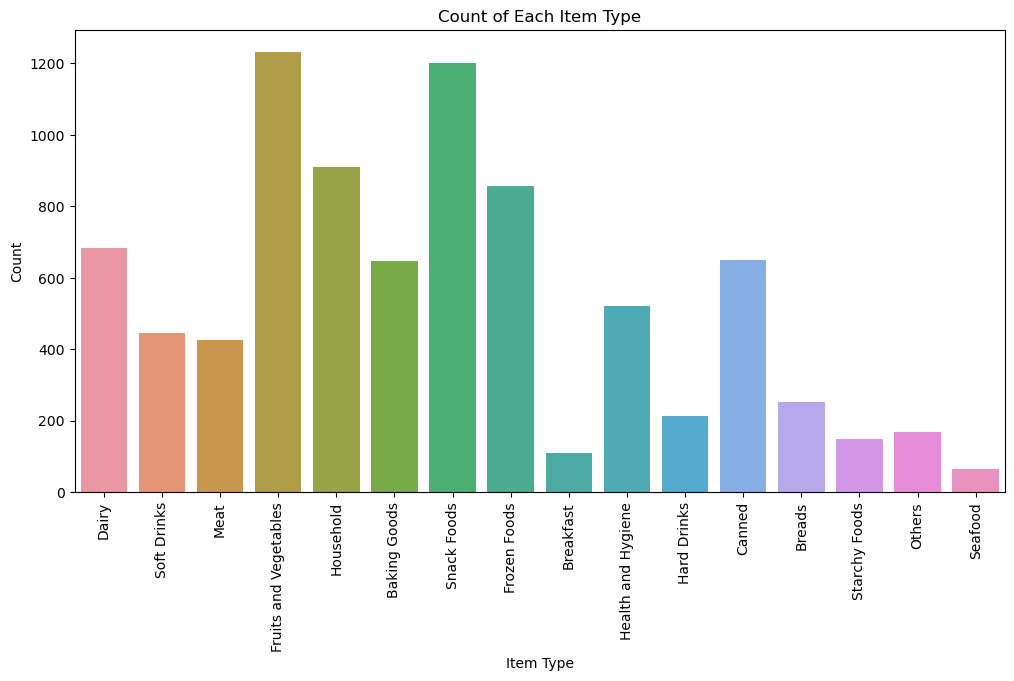

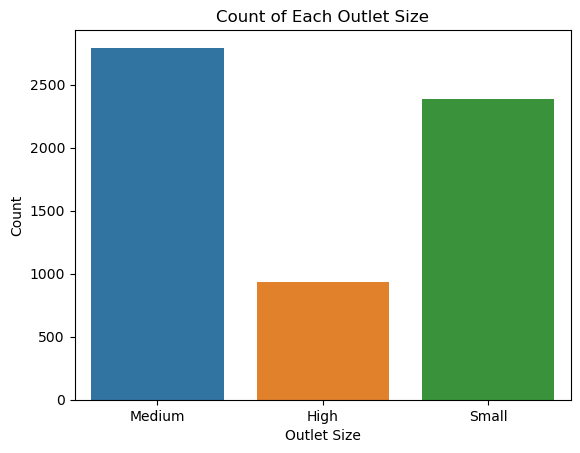

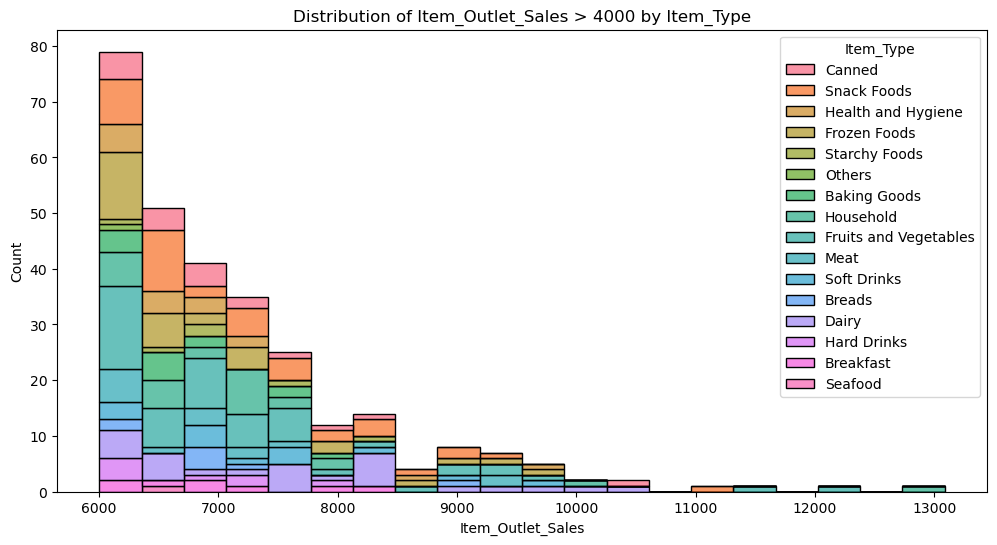

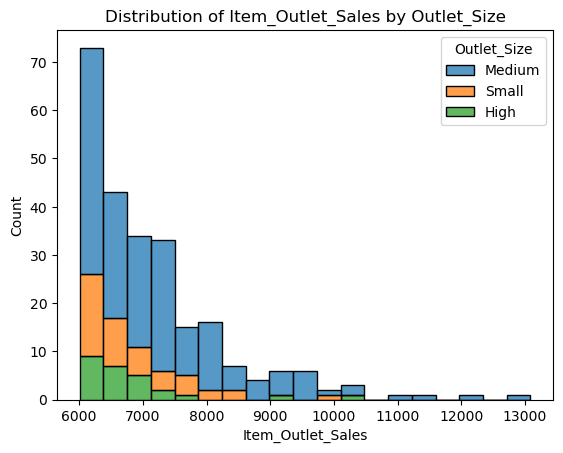

In [189]:

# Visualize the count of each category in categorical features

# Bar plot of 'Item_Fat_Content'
sns.countplot(x='Item_Fat_Content', data=Train)
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Count of Each Item Fat Content')
plt.show()

# Bar plot of 'Item_Type'
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=Train)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count of Each Item Type')
plt.xticks(rotation=90)
plt.show()

# Bar plot of 'Outlet_Size'
sns.countplot(x='Outlet_Size', data=Train)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Count of Each Outlet Size')
plt.show()


specific_price = 6000  # Specify the specific price threshold

# Filter the data based on the specific price threshold
filtered_data = Train[Train['Item_Outlet_Sales'] > specific_price]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='Item_Outlet_Sales', hue='Item_Type', multiple='stack')
plt.title('Distribution of Item_Outlet_Sales > 4000 by Item_Type')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.show()
sns.histplot(data=filtered_data, x='Item_Outlet_Sales', hue='Outlet_Size', multiple='stack')
plt.title('Distribution of Item_Outlet_Sales by Outlet_Size')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.show()


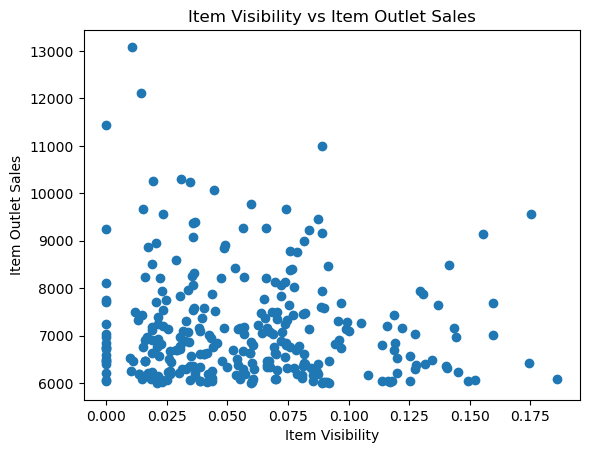

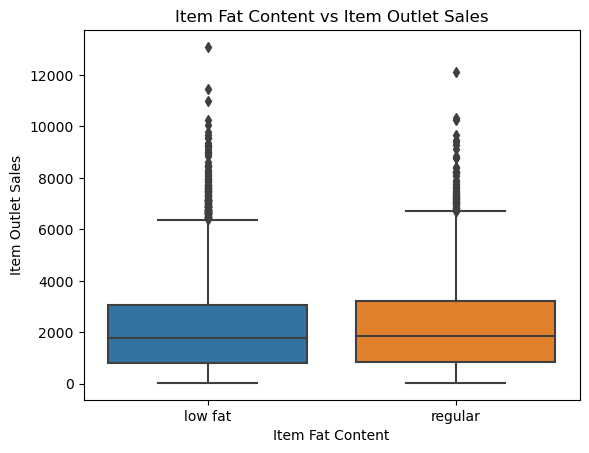

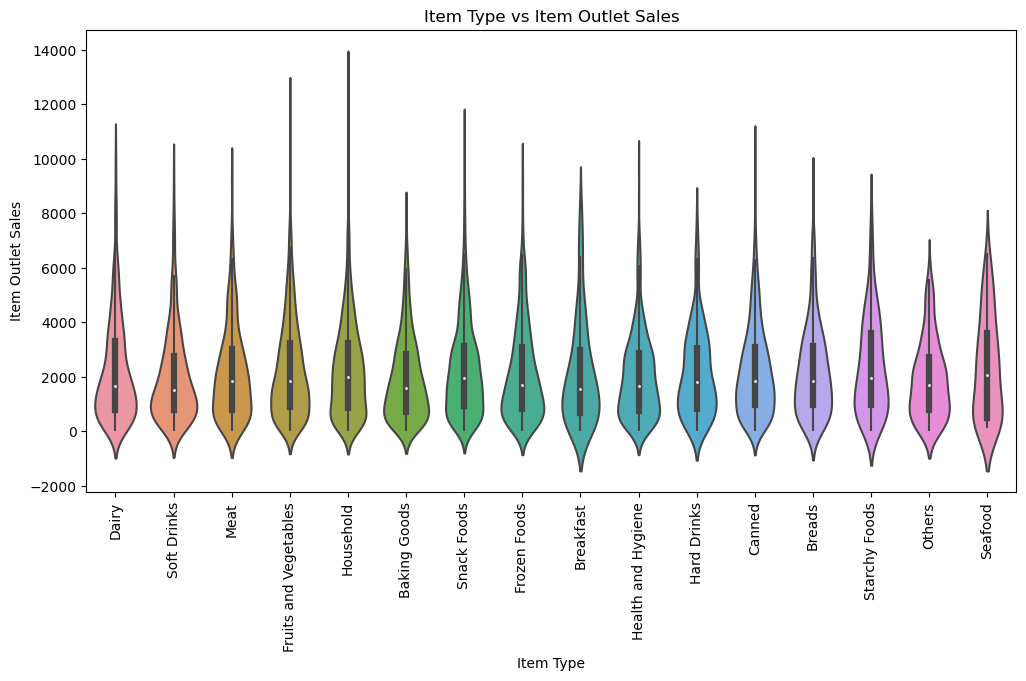

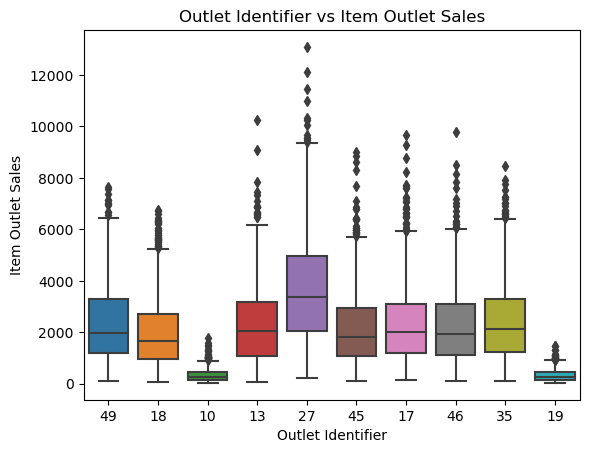

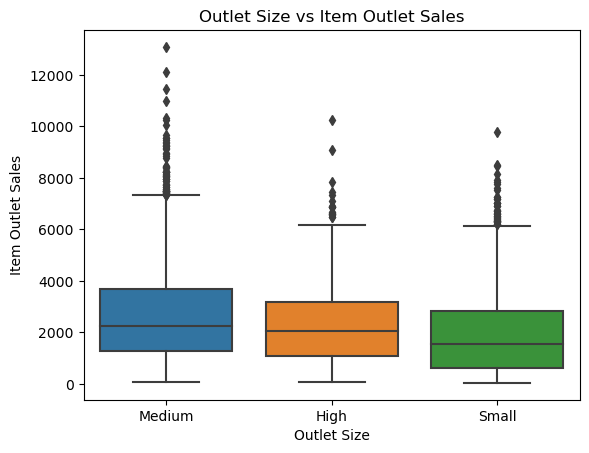

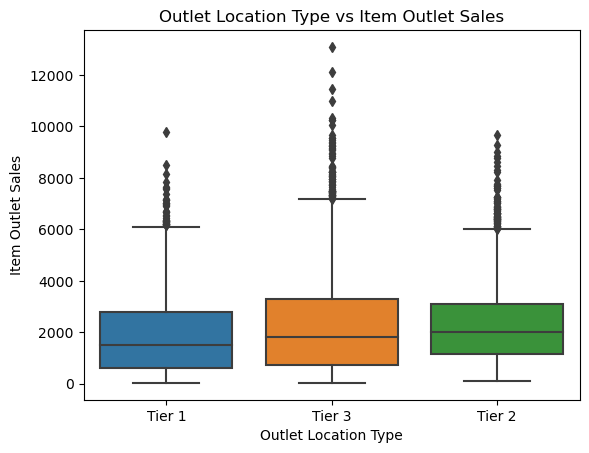

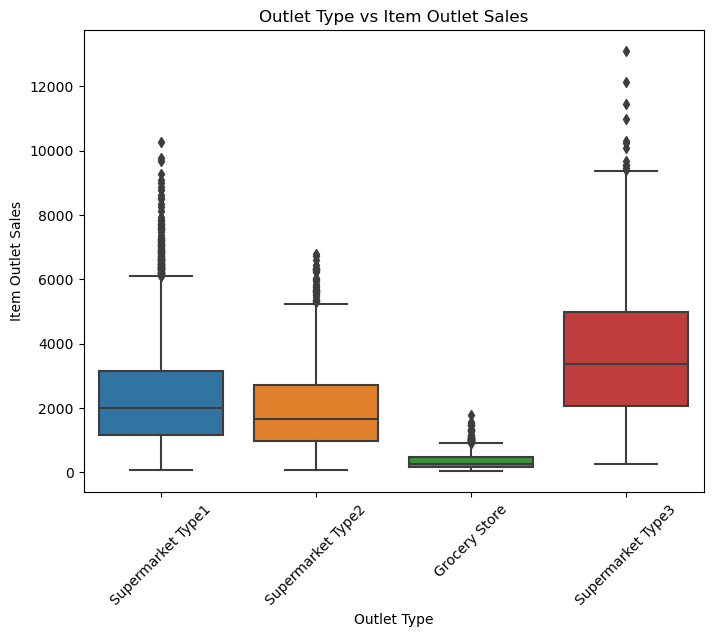

In [190]:

# Scatter plot: Item_MRP vs Item_Outlet_Sales
plt.scatter(filtered_data['Item_Visibility'], filtered_data['Item_Outlet_Sales'])
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility vs Item Outlet Sales')
plt.show()


# Box plot: Item_Fat_Content vs Item_Outlet_Sales
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Item Fat Content vs Item Outlet Sales')
plt.show()

# Violin plot: Item_Type vs Item_Outlet_Sales
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Item Type vs Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()


# Box plot: Outlet_Identifier vs Item_Outlet_Sales
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Identifier vs Item Outlet Sales')
plt.show()


# Box plot: Outlet_Size vs Item_Outlet_Sales
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Size vs Item Outlet Sales')
plt.show()

# Box plot: Outlet_Location_Type vs Item_Outlet_Sales
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Location Type vs Item Outlet Sales')
plt.show()

# Box plot: Outlet_Type vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Train)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Type vs Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


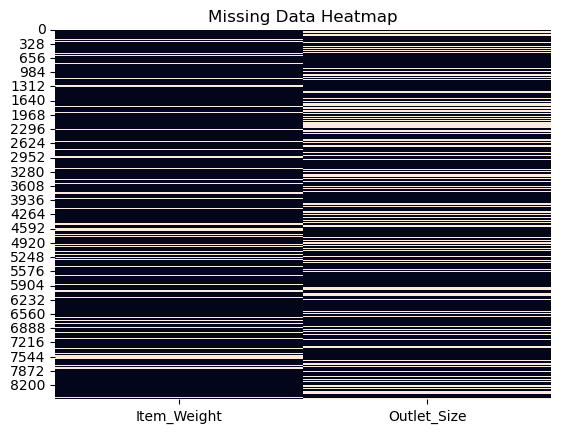

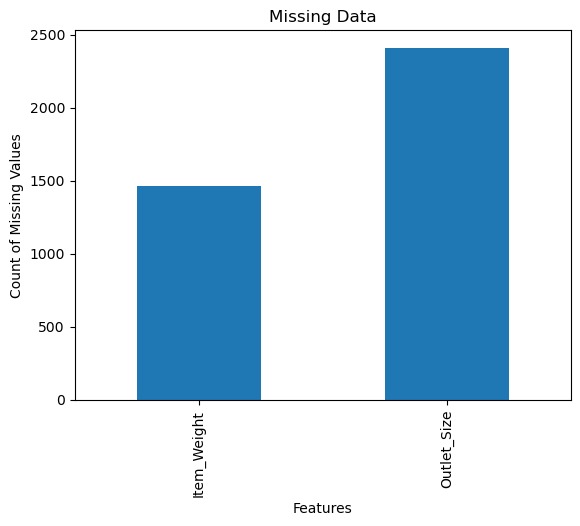

In [191]:
# Missing data heatmap
missing_data = Train[['Item_Weight', 'Outlet_Size']].isnull()
sns.heatmap(missing_data, cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

# Missing data bar plot
missing_counts = Train[['Item_Weight', 'Outlet_Size']].isnull().sum()
missing_counts.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.title('Missing Data')
plt.show()


In [192]:
# Display the first few rows of the DataFrame
Train['Outlet_Identifier'] = Train['Outlet_Identifier'].astype(int)
Test['Outlet_Identifier'] = Test['Outlet_Identifier'].astype(int)


Train.where((Train['Outlet_Identifier'] == 10) | (Train['Outlet_Identifier'] == 19)).dropna(subset=['Outlet_Identifier'])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998.0,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,low fat,0.057557,Baking Goods,107.6938,19.0,1985.0,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,regular,0.161467,Dairy,45.5086,10.0,1998.0,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,regular,0.072222,Canned,43.6454,19.0,1985.0,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,low fat,0.170349,Dairy,55.7956,10.0,1998.0,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,low fat,0.035016,Hard Drinks,144.3128,10.0,1998.0,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,NaN,low fat,0.000000,Snack Foods,154.5340,19.0,1985.0,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,regular,0.000000,Fruits and Vegetables,46.4744,10.0,1998.0,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,NaN,regular,0.102296,Fruits and Vegetables,162.3552,19.0,1985.0,Small,Tier 1,Grocery Store,487.3656


In [193]:
Train.loc[Train['Outlet_Identifier'] == 10, 'Outlet_Size'] = Train.loc[Train['Outlet_Identifier'] == 19, 'Outlet_Size'].values[0]
Test.loc[Test['Outlet_Identifier'] == 10, 'Outlet_Size'] = Test.loc[Test['Outlet_Identifier'] == 19, 'Outlet_Size'].values[0]


In [194]:
tier2_outlet_identifiers = Train.loc[Train['Outlet_Location_Type'] == 'Tier 2', 'Outlet_Identifier'].unique()
tier3_outlet_identifiers = Train.loc[Train['Outlet_Location_Type'] == 'Tier 3', 'Outlet_Identifier'].unique()
tier1_outlet_identifiers = Train.loc[Train['Outlet_Location_Type'] == 'Tier 1', 'Outlet_Identifier'].unique()
tier2_outlet_identifiers , tier3_outlet_identifiers , tier1_outlet_identifiers

(array([45, 17, 35]), array([18, 10, 13, 27]), array([49, 46, 19]))

In [195]:
Train.where((Train['Outlet_Identifier'] == 27) | (Train['Outlet_Identifier'] == 18) | (Train['Outlet_Identifier'] == 13) ).dropna(subset=['Outlet_Identifier']).head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,18.0,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
4,NCD19,8.930,low fat,0.000000,Household,53.8614,13.0,1987.0,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,18.0,2009.0,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,13.0,1987.0,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,27.0,1985.0,Medium,Tier 3,Supermarket Type3,4022.7636


In [196]:
Train.loc[Train['Outlet_Identifier'] == 17, 'Outlet_Size'] = Train.loc[Train['Outlet_Identifier'] == 35, 'Outlet_Size'].values[0]
Train.loc[Train['Outlet_Identifier'] == 45, 'Outlet_Size'] = 'Medium'
Test.loc[Test['Outlet_Identifier'] == 17, 'Outlet_Size'] = Test.loc[Test['Outlet_Identifier'] == 35, 'Outlet_Size'].values[0]
Test.loc[Test['Outlet_Identifier'] == 45, 'Outlet_Size'] = 'Medium'

outlet_identifiers_null_size = Test[Test['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()
outlet_identifiers_null_size

array([], dtype=int64)

In [197]:
Train['Item_Weight'].fillna( Train['Item_Weight'].mean(), inplace=True)
Test['Item_Weight'].fillna( Test['Item_Weight'].mean(), inplace=True)


/tmp/ipykernel_32/2388743229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Train.corr()


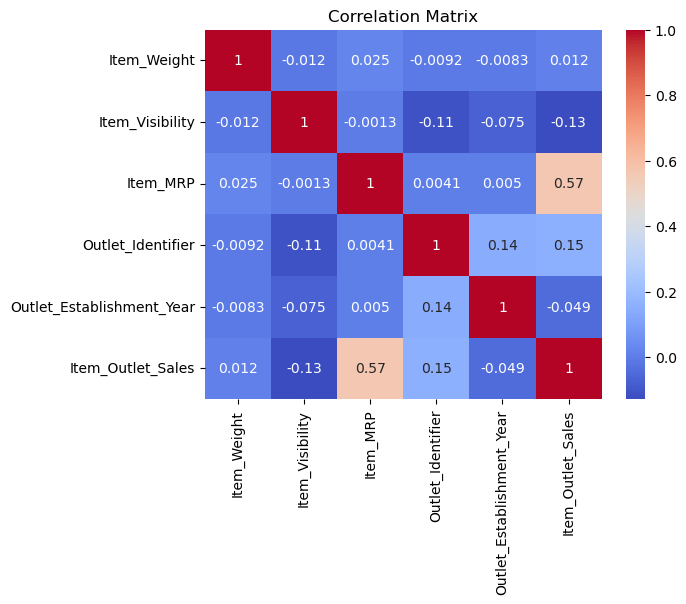

In [198]:


# Compute correlation matrix
corr_matrix = Train.corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


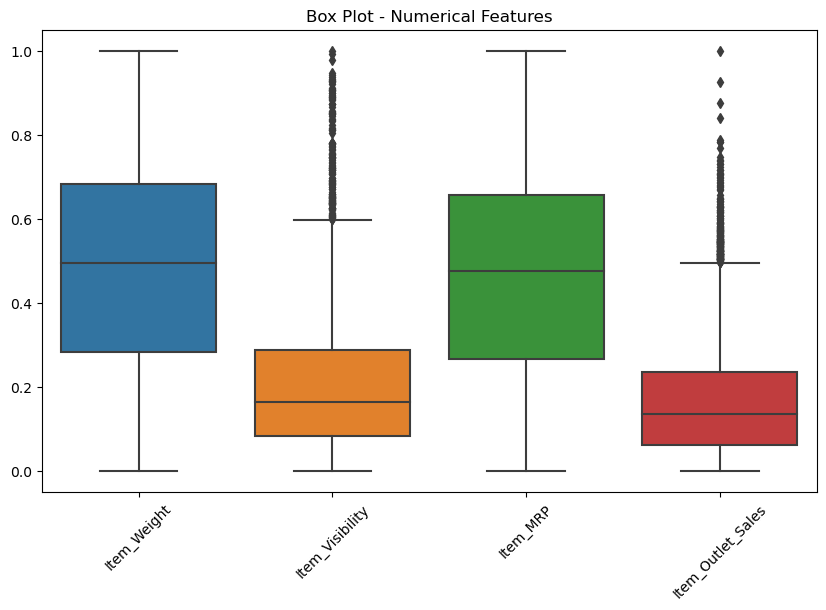

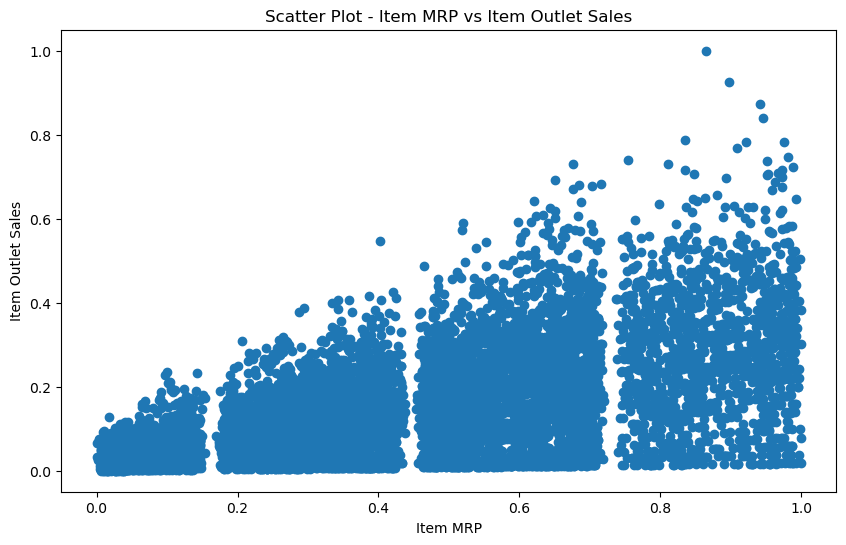

In [199]:


from sklearn.preprocessing import MinMaxScaler

# Scale the numerical features
scaler = MinMaxScaler()
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
df_scaled = pd.DataFrame(scaler.fit_transform(Train[numerical_features]), columns=numerical_features)

# Box plot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled)
plt.title('Box Plot - Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for analyzing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['Item_MRP'], df_scaled['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot - Item MRP vs Item Outlet Sales')
plt.show()







Considering both the MSE and R-squared scores, the baseline model with outliers performs better in terms of both minimizing prediction errors (lower MSE) and explaining the variance in the target variable (higher R-squared). Therefore, based on the given metrics, the model with outliers is preferred.

## Label Encoding , One hot encoding

In [200]:
print(Train['Item_Fat_Content'].unique())
print(Train['Outlet_Size'].unique())
print(Train['Outlet_Location_Type'].unique())

print(Test['Item_Fat_Content'].unique())
print(Test['Outlet_Size'].unique())
print(Test['Outlet_Location_Type'].unique())


['low fat' 'regular']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 3' 'Tier 2']
['low fat' 'regular']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']


## Preprocessing data

In [201]:
# Perform one-hot encoding
item_type_dummies = pd.get_dummies(Train['Item_Type'], prefix='Item_Type')
outlet_type_dummies = pd.get_dummies(Train['Outlet_Type'], prefix='Outlet_Type')

# Concatenate the one-hot encoded columns to the original DataFrame
Train = pd.concat([Train, item_type_dummies, outlet_type_dummies], axis=1)

test_item_type_dummies = pd.get_dummies(Test['Item_Type'], prefix='Item_Type')
test_outlet_type_dummies = pd.get_dummies(Test['Outlet_Type'], prefix='Outlet_Type')

# Concatenate the one-hot encoded columns to the Test DataFrame
Test = pd.concat([Test, test_item_type_dummies, test_outlet_type_dummies], axis=1)


Train.head()





,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Small,Tier 3,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,...,0,0,0,0,0,0,0,1,0,0


In [202]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
for column in columns_to_encode:
    Train[column] = label_encoder.fit_transform(Train[column])
    Test[column] = label_encoder.transform(Test[column])
Train['Item_Fat_Content'].astype('float')
Test['Item_Fat_Content'].astype('float')
Train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [203]:
Train.drop(['Item_Identifier', 'Outlet_Identifier' , 'Item_Type' , 'Outlet_Type'], axis=1, inplace=True)
Test.drop(['Item_Identifier', 'Outlet_Identifier' , 'Item_Type' , 'Outlet_Type'], axis=1, inplace=True)


In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
Train_scaled = scaler.fit_transform(Train)

# Prepare the data for modeling
X = Train.drop(['Item_Outlet_Sales'], axis=1)
y = Train['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate , cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error


# Initialize the models
linear_regression = LinearRegression()
ridge_regression = RidgeCV()
random_forest = RandomForestRegressor()
xgb_regressor = XGBRegressor()

# Define the evaluation metrics to be calculated
scoring = {'RMSE': 'neg_root_mean_squared_error', 'R2': 'r2'}

models = [
    ('Linear Regression', linear_regression),
    ('Regularized Linear Regression', ridge_regression),
    ('Random Forest', random_forest),
    ('XGBoost', xgb_regressor)
]


In [206]:


best_model = None
best_model_name = ""
best_rmse = float('inf')
best_mae = float('inf')

for model_name, model in models:
    scores = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=False)
    rmse = -scores['test_RMSE'].mean()
    y_pred = cross_val_predict(model, X, y, cv=5)
    mae = mean_absolute_error(y, y_pred)
    
    print(model_name, "Results:")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 Score:", scores['test_R2'].mean())
    print()
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_mae = mae
        best_model = model
        best_model_name = model_name
        
print("Best Model:", best_model_name)
print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)



Linear Regression Results:
RMSE: 1133.672481231355
MAE: 840.0208481696665
R2 Score: 0.5581002833111326

Regularized Linear Regression Results:
RMSE: 1133.4453667850325
MAE: 839.4425790165017
R2 Score: 0.558279789989383

Random Forest Results:
RMSE: 1145.9749267573184
MAE: 799.6081859457937
R2 Score: 0.5479360118683473

XGBoost Results:
RMSE: 1177.1401622581973
MAE: 820.6710376173371
R2 Score: 0.523140127001113

Best Model: Regularized Linear Regression
Best RMSE: 1133.4453667850325
Best MAE: 839.4425790165017


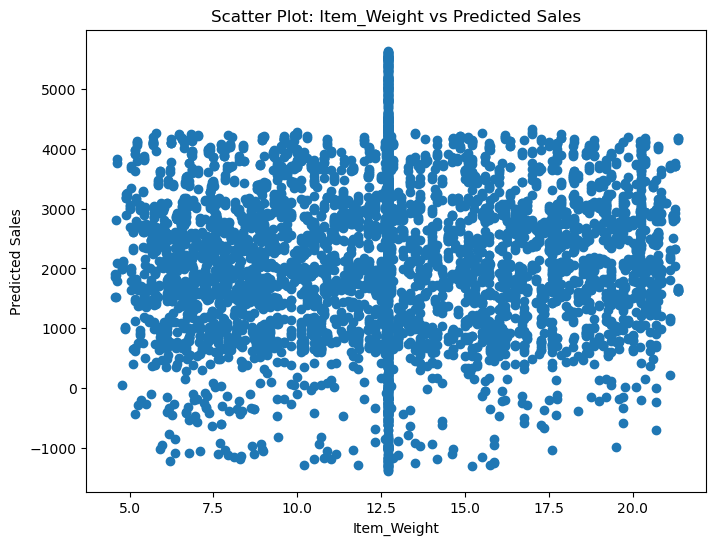

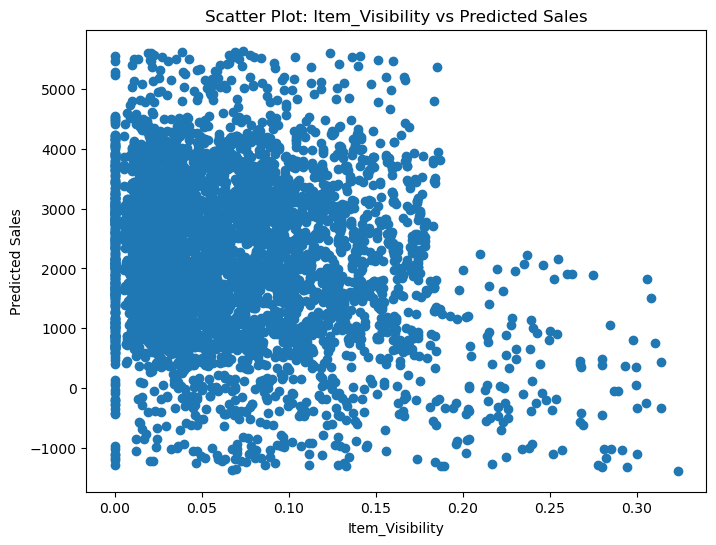

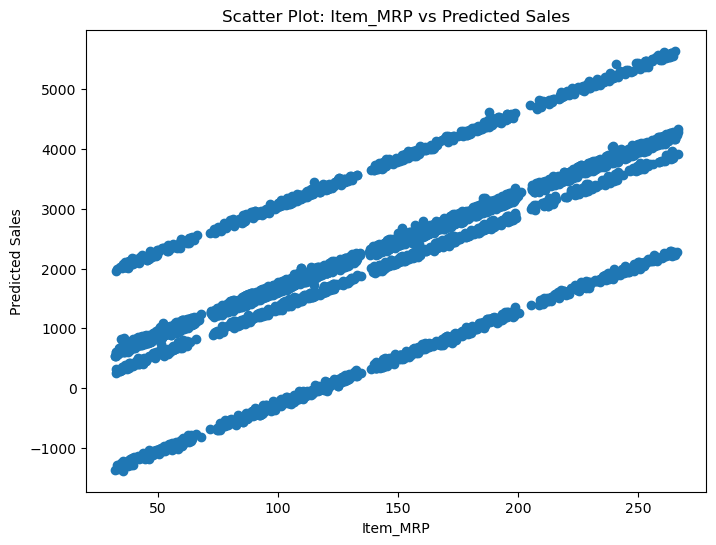

In [207]:
# Train the best model on the entire dataset
best_model.fit(X, y)
# Predict the sales for the Test dataset
y_pred = best_model.predict(Test)

# Create scatter plots for numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(Test[feature], y_pred)
    plt.xlabel(feature)
    plt.ylabel('Predicted Sales')
    plt.title(f'Scatter Plot: {feature} vs Predicted Sales')
    plt.show()


In [208]:
Test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

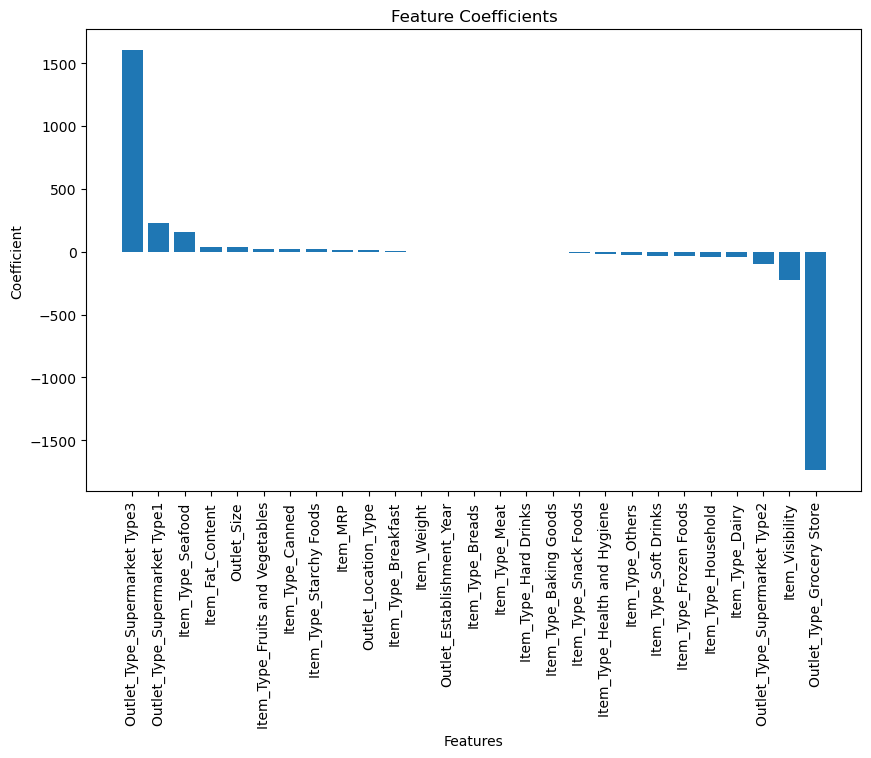

In [209]:
# Get the coefficients of the linear regression model
coefficients = best_model.coef_

# Sort coefficients in descending order
indices = np.argsort(coefficients)[::-1]

# Rearrange feature names based on coefficients
feature_names = X.columns[indices]

# Create a bar plot for feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[indices])
plt.xticks(range(len(coefficients)), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()


In [211]:
# Create a column for outlet sales in the Test dataset
Test['Outlet_Sales'] = y_pred
Outlet_Sales = Test['Outlet_Sales'].copy()
Test_final =  pd.concat([Test_copy, Outlet_Sales], axis=1)

Test_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,FDW58,20.750,low fat,0.007565,Snack Foods,107.8622,49,1999,Medium,Tier 1,Supermarket Type1,1763.682234
1,FDW14,8.300,regular,0.038428,Dairy,87.3198,17,2007,NaN,Tier 2,Supermarket Type1,1500.415356
2,NCN55,14.600,low fat,0.099575,Others,241.7538,10,1998,NaN,Tier 3,Grocery Store,1913.431878
3,FDQ58,7.315,low fat,0.015388,Snack Foods,155.0340,17,2007,NaN,Tier 2,Supermarket Type1,2549.711563
4,FDY38,NaN,regular,0.118599,Dairy,234.2300,27,1985,Medium,Tier 3,Supermarket Type3,5124.558265
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,regular,0.013496,Snack Foods,141.3154,46,1997,Small,Tier 1,Supermarket Type1,2368.039882
5677,FDD47,7.600,regular,0.142991,Starchy Foods,169.1448,18,2009,Medium,Tier 3,Supermarket Type2,2461.588344
5678,NCO17,10.000,low fat,0.073529,Health and Hygiene,118.7440,45,2002,NaN,Tier 2,Supermarket Type1,1933.261012
5679,FDJ26,15.300,regular,0.000000,Canned,214.6218,17,2007,NaN,Tier 2,Supermarket Type1,3552.995609


In [212]:

Test_final.to_csv('output.csv', index=False)
